# **Project: Text Sentiment Analysis using Naive Bayes Classifier and Neural Network Models**
<hr>

- **Author**: Uyen Nguyen
- **Date**: April 2024
- **Course**: AI Vietnam - Course 2023

<hr>

## **I. Introduction**

***Text Classification*** is a fundamental task in Natural Language Processing (NLP) that involves assigning labels to text units. These text units can range from individual words to paragraphs or entire documents. For this specific project, we are focusing on sentiment analysis, which involves classifying text as positive or negative. Sentiment analysis is crucial for understanding public opinion, customer feedback, and social media monitoring. In this project, we will build two types of classifiers: Naive Bayes Classifier and Neural Network. By building these models, we can compare their performance and automate the process of determining the sentiment expressed in textual data, which has applications in various domains such as marketing, customer service, and political analysis.

## **II. Dataset Information**
For this project, we are using the NTC-SCV dataset, which is available to access via this [GitHub](https://github.com/congnghia0609/ntc-scv) repository. The NTC-SCV dataset is a collection of Vietnamese text reviews used for sentiment analysis. It contains 50,000 samples, each labeled as either positive or negative. The dataset is specifically designed to help train and evaluate text classification models. Here is a detailed description of the dataset:
 
<figure style="text-align: center;">
  <img src="../images/1.dataset-description.png" alt="Dataset Description" width="700"/>
  <figcaption>Image 1: NTC-SCV Dataset Description</figcaption>
</figure>

The dataset is organized into three main subsets:
- *Training Set*: Contains 30,000 samples used to train the model.
- *Validation Set*: Contains 10,000 samples used to tune the model and prevent overfitting.
- *Test Set*: Contains 10,000 samples used to evaluate the final model's performance.

Each subset is further divided into two categories:
- *Positive Reviews*: Reviews that express a positive sentiment, labeled as 1.
- *Negative Reviews*: Reviews that express a negative sentiment, labeled as 0.

The data is stored in directories with each review saved as a text file. The directory structure is as follows:
```data/
├── train/
│   ├── pos/
│   └── neg/
├── valid/
│   ├── pos/
│   └── neg/
└── test/
    ├── pos/
    └── neg/
```
Examples of positive sentiment reviews might include praise for a product, positive feedback on a service, or general expressions of satisfaction. Negative sentiment reviews, on the other hand, might include complaints, expressions of dissatisfaction, or criticisms.

By leveraging the NTC-SCV dataset, we can develop and evaluate sentiment analysis models tailored to the Vietnamese language, contributing to advancements in NLP for underrepresented languages and providing practical tools for various real-world applications.

## **III. Project Framework**

In this project, we will train a sentiment text classification model using both Naive Bayes and Neural Network approaches. Here are the general steps of the project:

1. **Data Acquisition and Loading**: Initially, we will clone the dataset directly from a GitHub source, unzip it, and load it into our notebook.

2. **Text Data Preprocessing**: We will clean and prepare the text data for modeling by removing special characters, stop words, and other irrelevant data. Additionally, we will normalize the text by lowercasing, correcting typos, and converting abbreviations.

3. **Vector Representation**: After preprocessing, the text data will be converted into a numerical format that machine learning algorithms can process. We will achieve this by transforming the text into vectors using word embeddings.

4. **Building the Classification Models**: With the text data in a usable format, we will construct two models for classification: a Naive Bayes classifier and a Neural Network model.

5. **Model Training**: During this phase, the models learn to associate the input text vectors with the correct labels. This is achieved by adjusting the network weights based on a loss function. We will also set aside a portion of the dataset for validation to monitor for overfitting and fine-tune the model parameters.

6. **Prediction and Model Evaluation**: Finally, we will use the trained models to predict the labels of new, unseen text data. The models' performance will be evaluated using metrics such as accuracy, precision, recall, and F1-score to determine their generalization capabilities on new data.

These steps outline the essential framework for training a neural network to effectively classify text data, ensuring the models are both accurate and robust.

<figure style="text-align: center;">
  <img src="../images/2.pipeline.png" alt="Project Pipeline" width="700"/>
  <figcaption>Image 2: Project Pipeline</figcaption>
</figure>

## **IV. Project Implementation**
### **1. Import Neccesary Libraries**
First, we will import all necessaries libraries for this project. For now, we will import basic libraries that usually use in Machine Learning. As we go through the project, we will import more libraries if necessary.

In [1]:
# Import necessary for the projects
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2. Data Cloning and Loading**
For our project, we will clone the original [GitHub](https://github.com/congnghia0609/ntc-scv) link accessed to the NTC-SCV dataset to our local environment and unzip those files as follows:

In [ ]:
# Download the dataset from github
!git clone https://github.com/congnghia0609/ntc-scv
!unzip ./ntc-scv/data/data_test.zip -d ../data
!unzip ./ntc-scv/data/data_train.zip -d ../data
!rm -rf ./ntc-scv

After unzipping, we have obtained a new `data` folder with two subfolders, `data_test` and `data_set`, which we will use for training and testing our model as we progress. Now, we will define a function to read the files in these folders and store them in variables as follows:

In [3]:
# Define function to read data from file
def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding='utf-8') as f:
                linens = f.readlines()
            sentence = " ".join(linens)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence'  : sentence,
                'label'     : label
            }
            examples.append(data)
    return pd.DataFrame(examples)

Then, using the function above along with the distribution of the dataset, we will store the data we just cloned into three distinct variables: `train_df` for the training data, `valid_df` for the validation data, and `test_df` for the testing data.

In [4]:
# Declare the path to specific data folder
folder_path = {
    'train': '../data/data_train/train',
    'valid': '../data/data_train/test',
    'test' : '../data/data_test/test'
}

# Load data to corresponding variables
train_df = load_data_from_path(folder_path['train'])
valid_df = load_data_from_path(folder_path['valid'])
test_df  = load_data_from_path(folder_path['test'])

For a quick sanity check, we will use some basic `pandas` methods to inspect the data we have loaded into the three variables: `train_df`, `valid_df`, and `test_df`. We will start with a quick check of the training dataset stored in `train_df`. The other two variables can be inspected using similar strategies:

In [19]:
# First ten rows of the train_df dataframe
train_df.head(10)

sentence  label
0  Quán đồ_ăn khá ngon . . nhưng phục_vụ không tố...      0
1  Hôm_nay đi ăn tại quán , món ăn ngon vừa_miệng...      0
2  Qua ́ n cư ̣ c ngon . Tuâ ̀ n na ̀ o mi ̀ nh c...      0
3  Chán , đồ uống khá nhạt . Với không_gian và ch...      0
4  Mì ăn ok 👍 🏻 👍 🏻 👍 🏻 nhưng nguội , view rộng ,...      0
5  Bữa có ghé đây ăn , súp chỉ bán tô , 1 tô 15k ...      0
6  Tối mình có mua tàu_hũ bên này . Combo 2 bao_g...      0
7  - Vị_trí : Đường vào thì khá dễ tìm nhưng khi ...      0
8  Ngoài không_gian thoáng_đãng , rộng_rãi . Quán...      0
9  Uwifi quá chậm\n Nhân_viên phục_vụ rất chảnh\n...      0

As we can see, `train_df` contains reviews in Vietnamese for various restaurants. It has two variables: `sentence` for the reviews and `label` for labeling the type of reviews. All of the first ten sentences are labeled 0, indicating that they are all negative comments. It is also worth to note that the reviews in the `sentence` column have an inconsistent format; some contain underscores (_), some lack proper diacritics, and others include icons. These issues will be our initial focus in the later data normalization step.

In [6]:
# Summarized information of the train_df dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  30000 non-null  object
 1   label     30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


The `train_df` variable contains 30,000 entries, which is consistent with our expectations based on the dataset's description. Additionally, there are no missing values, which is a positive sign for our model training process later on.

### **3. Exploratory Data Analysis (EDA)**
Now, we will some additional libraries and methods to better understand our datasets. First, we want to see how balanced the positive reviews are compared to the negative reviews.

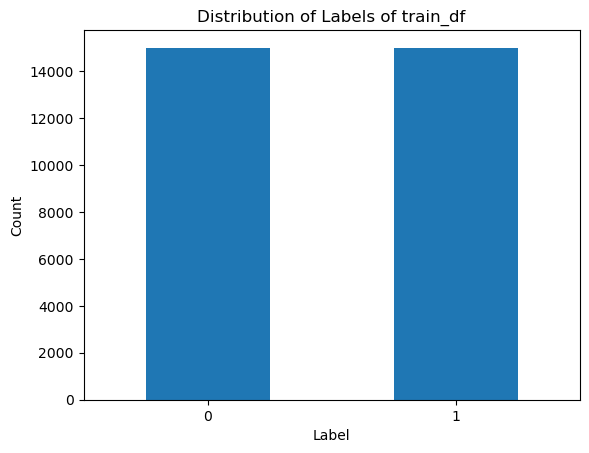

In [26]:
# Categories distribution for train_df dataframe
label_counts = train_df['label'].value_counts()
label_counts.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Label')
plt.xticks(rotation=0)  
plt.title('Distribution of Labels of train_df')
plt.show()

Indeed, we have a balanced dataset for training, where half of the reviews are positive and the other half are negative. This is a good sign, as it means we don't have to implement extra algorithms to rebalance the data.

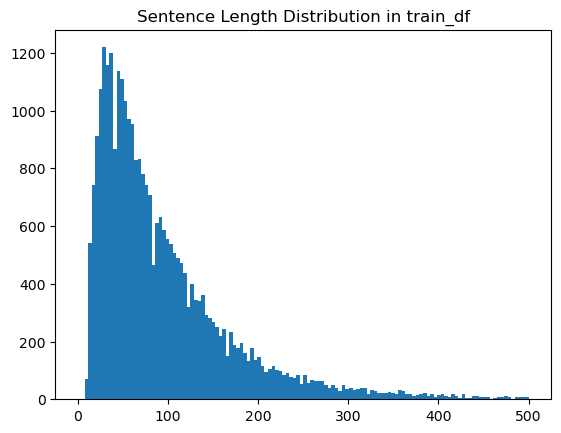

In [29]:
# Length of review comments in train_df dataframe
plt.hist([len(sentence.split()) for sentence in train_df['sentence']], bins=128, range=(0, 500))
plt.title('Sentence Length Distribution in train_df')
plt.show()

The histogram shows a clear peak around the 0-50 range, indicating that most sentences are relatively short. The distribution is right-skewed, with sentence lengths tapering off as they increase, extending up to around 500 characters. There are fewer long sentences, but some do reach lengths of over 400 characters. These might be complex sentences or include multiple clauses.

In [31]:
# The vocabulary size and the total word count
from collections import Counter

words = []
for sentence in train_df['sentence']:
    words.extend(sentence.split())  

vocabulary = Counter(words)
len(vocabulary), len(words)

(46372, 2962235)

There are 46,372 unique words in the dataset, and a total of 2,962,235 words across all sentences. This suggests a rich vocabulary within the dataset, which will be crucial for the accuracy of our model afterward.

Now, we will create a Word Cloud to better visualize our dataset:

In [ ]:
# Install the WordCloud library using pip
%pip install WordCloud

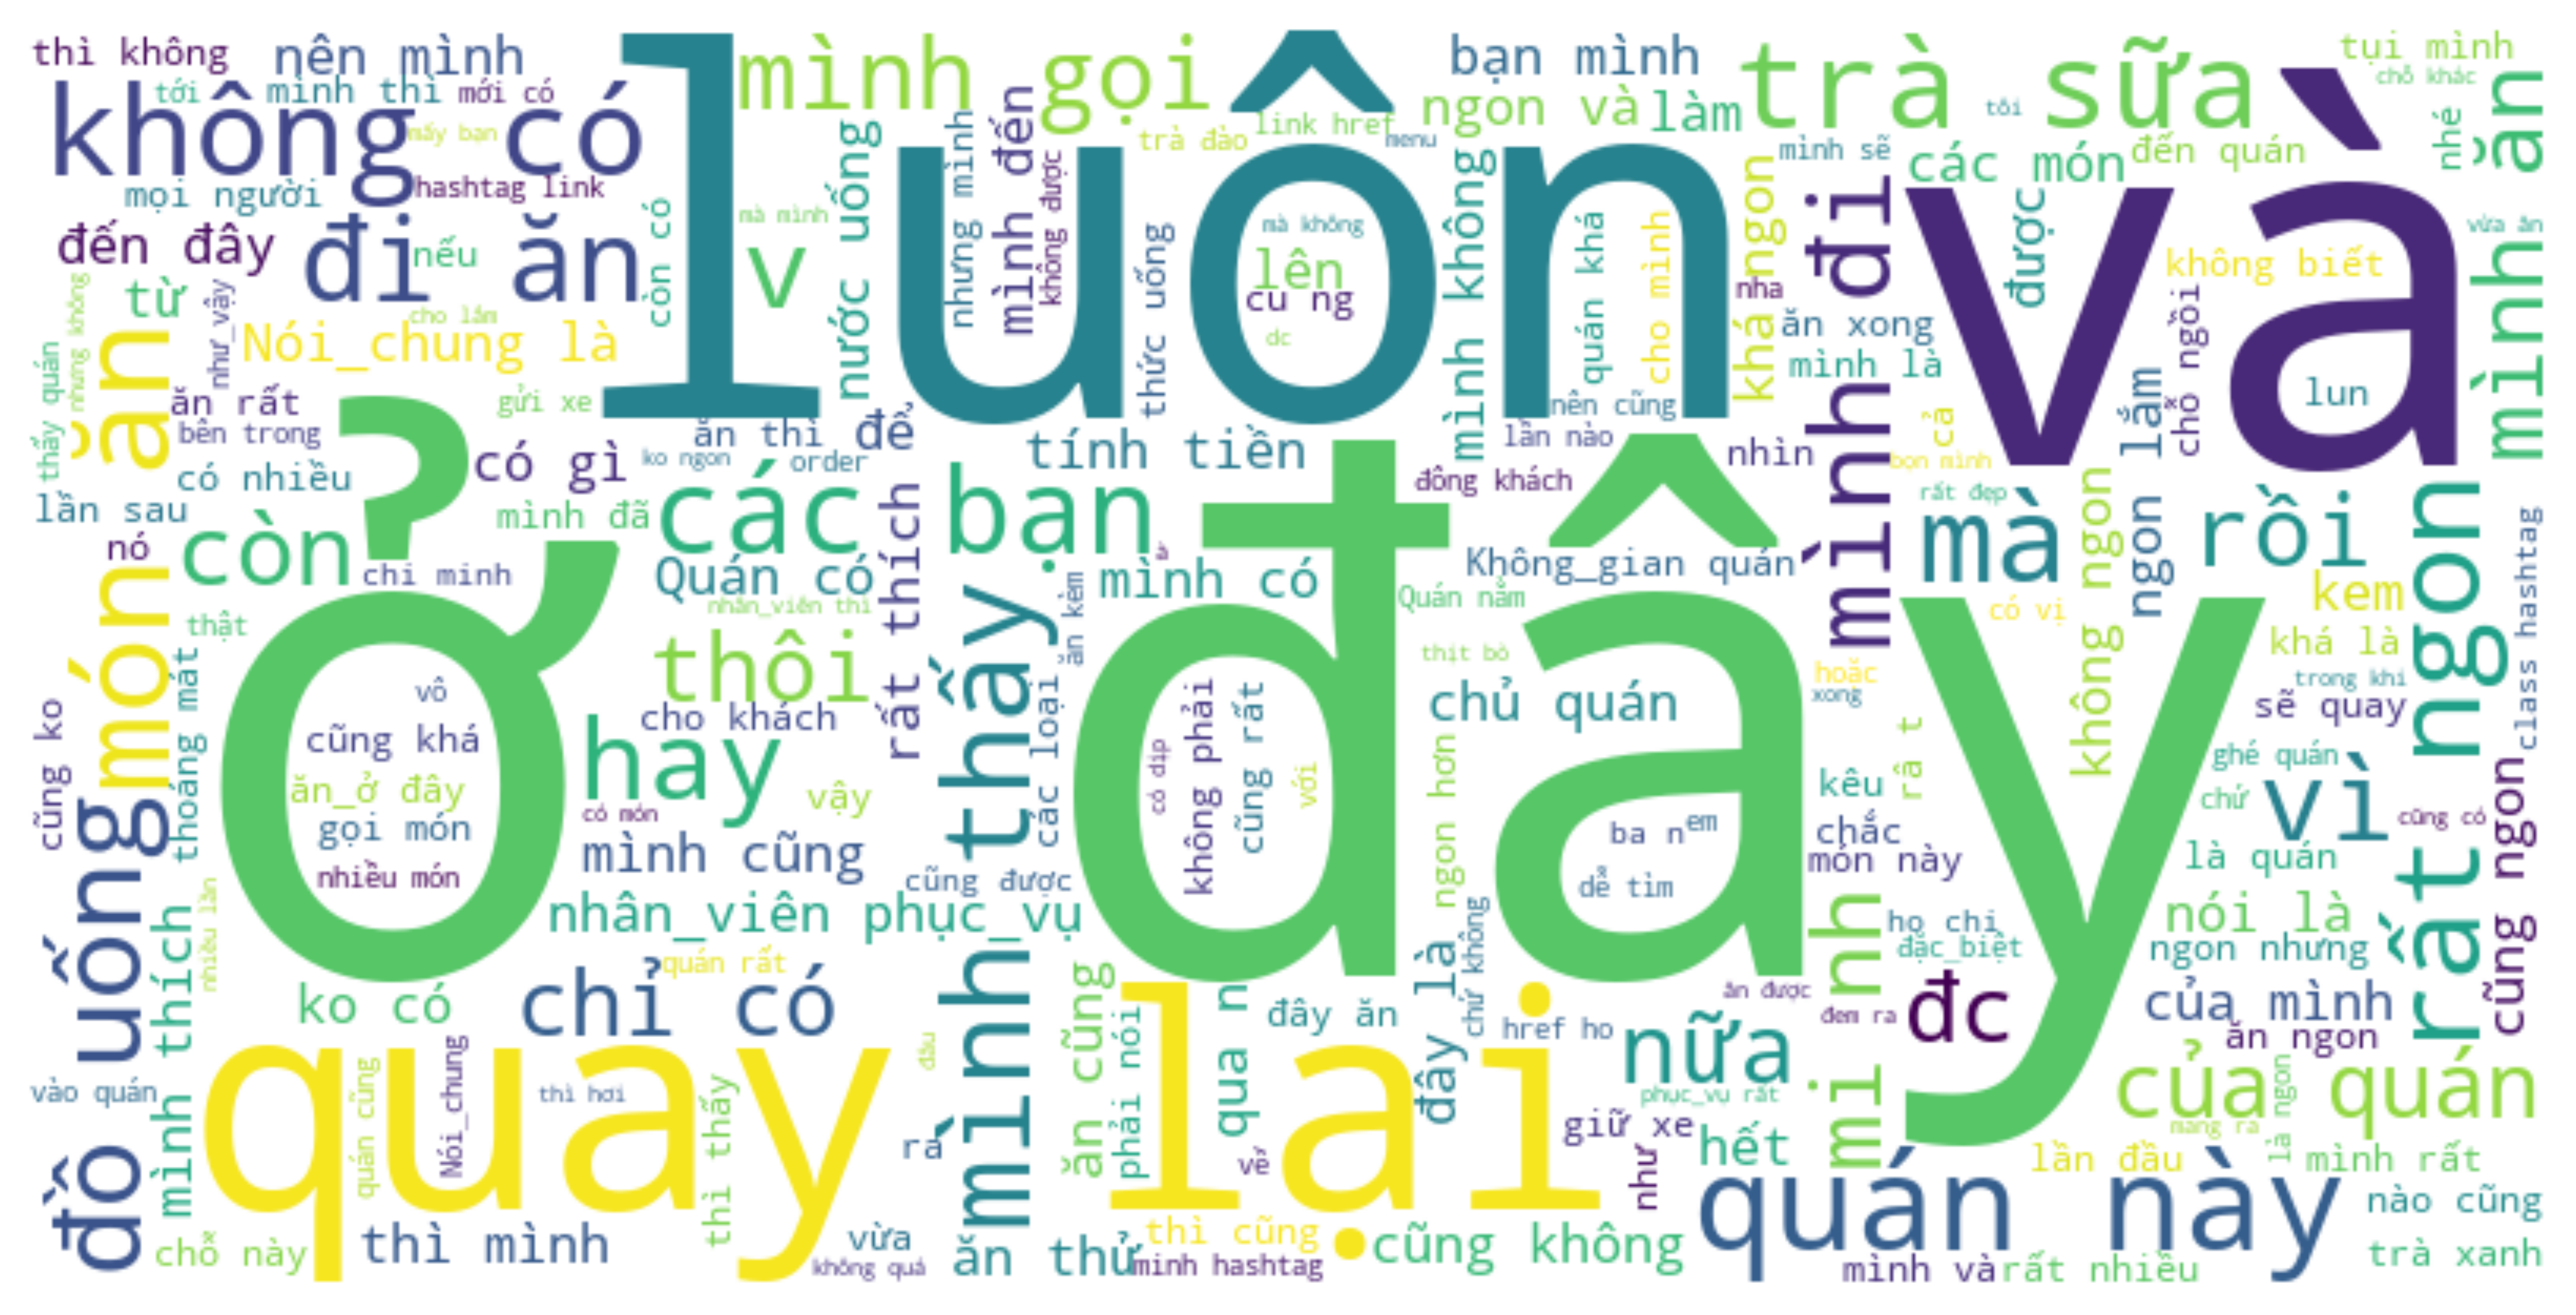

In [51]:
# Import necessary libraries
from wordcloud import WordCloud

# Aggregate all tweets from the 'sentence' column of train_df into a single list
sentences = train_df['sentence'].tolist()

# Combine the list of sentences into a single string
sentences_as_one_string = " ".join(sentences)

# Set up the plotting figure with defined figure size
plt.figure(figsize=(12, 12), dpi=600)  # Increase DPI for better resolution

# Create a Word Cloud and display it using matplotlib
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(sentences_as_one_string)
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis('off')  
plt.show()  

### **4. Data Preprocessing**

#### **a. Extract Vietnamese Comments Only**

<figure style="text-align: center;">
  <img src="../images/3.extract-Vietnamese.png" alt="Extract Vietnamese only" width="600"/>
  <figcaption>Image 3: Extract Vietnamese Reviews using langid library</figcaption>
</figure>

For the scope of our project, we will restrict ourselves to Vietnamese comments/reviews only. Thus, we will first extract a subset of our initial dataset that contains only Vietnamese comments. We will implement this using the `langid` library.

In [ ]:
# Install langid library
%pip install langid

In [34]:
from langid.langid import LanguageIdentifier, model

# Define function to obtain Vietnamese comments only
def identify_vn(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs = True)
    not_vi_idx = set()
    THRESHOLD  = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row["sentence"])
        if score[0] != "vi" or (score[0] == "vi" and score[1] <= THRESHOLD):
            not_vi_idx.add(idx) 
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_idx = df[df.index.isin(not_vi_idx)]

    return vi_df, not_vi_idx

This function will return two dataframes: one for Vietnamese comments and the other for comments in different languages.

In [35]:
# Classify on train dataset
train_df_vi, train_df_other = identify_vn(train_df)

Let us examine the new dataframe that contains only Vietnamese reviews:

In [36]:
# Summary of train_df_vi dataframe
train_df_vi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29736 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  29736 non-null  object
 1   label     29736 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 696.9+ KB


We can see that from the original dataframe, we have extracted a new dataframe, `train_df_vi`, which contains 29,736 Vietnamese-only reviews. This is a significant proportion of the original dataset, ensuring that we will still have a sufficiently rich dataset and vocabulary for our model training.

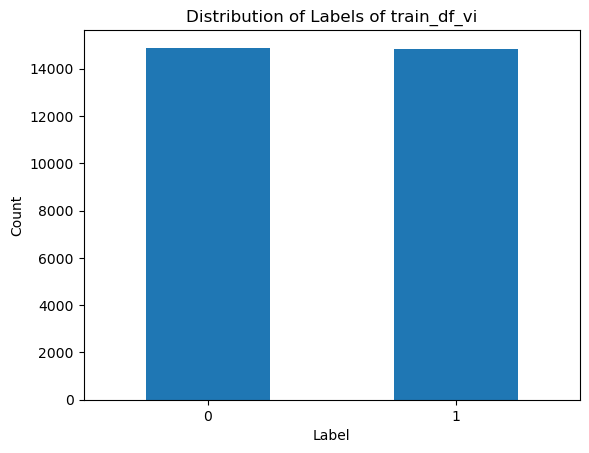

In [38]:
# Categories distribution for train_df_vi dataframe
label_counts = train_df_vi['label'].value_counts()
label_counts.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Label')
plt.xticks(rotation=0)  
plt.title('Distribution of Labels of train_df_vi')
plt.show()

Also, the distribution of labels for `train_df_vi` are still relatively equal. Thus, we can continue to process without worrying about imbalance data.

#### **b. Data Cleaning**

<figure style="text-align: center;">
  <img src="../images/4.text-cleaning.png" alt="Text Cleaning Process" width="600"/>
  <figcaption>Image 4: Text Cleaning Procedure</figcaption>
</figure>

As we have acknowledged, the sentences in our training data do not have a consistent format. Therefore, we will need to clean our data first before creating the model and feeding the data into it. This step will include:
* Removing URLs and HTML tags
* Removing punctuation and digits
* Removing emoticons, flags, etc.
* Normalizing whitespace
* Lowercasing all text

In [53]:
import re  
import string  

def preprocess_text(text):
    # Compiles a regular expression to match URLs
    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    # Replaces URLs in the text with a single space
    text = url_pattern.sub(r" ", text)

    # Compiles a regular expression to match HTML tags
    html_pattern = re.compile(r'<[^<>]+>')
    # Replaces HTML tags in the text with a single space
    text = html_pattern.sub(" ", text)

    # List of characters to replace, combining punctuation and digits
    replace_chars = list(string.punctuation + string.digits)
    # Loop over each character in the list and replace it with a space
    for char in replace_chars:
        text = text.replace(char, " ")

    # Compiles a regular expression to match various emoticons and symbols, including flags
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    # Replaces emoticons and other symbols in the text with a single space
    text = emoji_pattern.sub(r" ", text)

    # Splits the text into words and rejoins them to normalize whitespace
    text = " ".join(text.split())

    # Converts all characters in the text to lowercase
    return text.lower()

In [56]:
# Apply the preprocess_text function to all dataset variables
train_df_vi.loc[:, 'preprocess_sentence'] = train_df_vi['sentence'].apply(preprocess_text)
valid_df.loc[:, 'preprocess_sentence'] = valid_df['sentence'].apply(preprocess_text)
test_df.loc[:, 'preprocess_sentence'] = test_df['sentence'].apply(preprocess_text)

In [57]:
# First ten row of train_df_vi after preprocessing
train_df_vi.head(10)

sentence  label  \
0  Quán đồ_ăn khá ngon . . nhưng phục_vụ không tố...      0   
1  Hôm_nay đi ăn tại quán , món ăn ngon vừa_miệng...      0   
2  Qua ́ n cư ̣ c ngon . Tuâ ̀ n na ̀ o mi ̀ nh c...      0   
3  Chán , đồ uống khá nhạt . Với không_gian và ch...      0   
4  Mì ăn ok 👍 🏻 👍 🏻 👍 🏻 nhưng nguội , view rộng ,...      0   
5  Bữa có ghé đây ăn , súp chỉ bán tô , 1 tô 15k ...      0   
6  Tối mình có mua tàu_hũ bên này . Combo 2 bao_g...      0   
7  - Vị_trí : Đường vào thì khá dễ tìm nhưng khi ...      0   
8  Ngoài không_gian thoáng_đãng , rộng_rãi . Quán...      0   
9  Uwifi quá chậm\n Nhân_viên phục_vụ rất chảnh\n...      0   

                                 preprocess_sentence  
0  quán đồ ăn khá ngon nhưng phục vụ không tốt ch...  
1  hôm nay đi ăn tại quán món ăn ngon vừa miệng k...  
2  qua ́ n cư ̣ c ngon tuâ ̀ n na ̀ o mi ̀ nh cu ...  
3  chán đồ uống khá nhạt với không gian và chất l...  
4  mì ăn ok nhưng nguội view rộng nhưng kêu món v...  
5  bữa có ghé đây ăn súp chỉ bán tô tô k không gi...  
6  tối mình có mua tàu hũ bên này combo bao gồm t...  
7  vị trí đường vào thì khá dễ tìm nhưng khi tìm ...  
8  ngoài không gian thoáng đãng rộng rãi quán chẳ...  
9  uwifi quá chậm nhân viên phục vụ rất chảnh quá...

After preprocessing, the sentences have become more consistent with each other, which will ease the process of training our model without introducing any unexpected behaviors.

### **5. Text Representation**

We prepare the dataset by encoding each sentence into numerical indices using the vocabulary. This is done by tokenizing each sentence and converting the tokens to their respective indices. We then pair these encoded sentences with their labels and convert the dataset into a map-style dataset, which is compatible with PyTorch's DataLoader for efficient batch processing.

#### **a. Initialize a Tokenizer**
First, for word-based tokenization, we will initialize a tokenizer specifically designed for basic English. This tokenizer will segment the text into discrete words, serving as a crucial initial step in our NLP workflow.

In [ ]:
# Install torchtext for text tokenization
%pip install -q torchtext

In [61]:
from torchtext.data.utils import get_tokenizer

# Initialize a tokenizer for basic English text
tokenizer = get_tokenizer("basic_english")

In [64]:
# Example of tokenize the first sentence in the train_df_vi dataset
tokenizer(train_df_vi['preprocess_sentence'][0])[:10]

['quán', 'đồ', 'ăn', 'khá', 'ngon', 'nhưng', 'phục', 'vụ', 'không', 'tốt']

The output is a list of the first ten Vietnamese tokens extracted from the first sentence of the dataset. This illustrates how the sentence has been broken down into individual components that are used for our text representation.

#### **b. Define a Token Generator**
Now, we will define a generator function `yield_tokens` that takes a list of sentences and a tokenizer. This function will yield each sentence as a list of tokens, suitable for vocabulary building.

In [65]:
def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

#### **c. Build the Vocabulary**
Then, we build a vocabulary from the tokenized text. This vocabulary will be limited to the most frequent 10,000 tokens and include a special token for unknown words (`<unk>`).

In [66]:
from torchtext.vocab import build_vocab_from_iterator

# Build vocabulary
vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'], tokenizer),
    max_tokens = vocab_size,
    specials   = ["<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

#### **d. Convert to Torchtext Dataset**
After building the vocabulary, we will convert the preprocessed text data into a format compatible with machine learning models. This involves encoding each sentence using the previously built vocabulary and pairing it with its label.

In [67]:
from torchtext.data.functional import to_map_style_dataset

# Function to prepare a dataset by encoding sentences into numerical indices and pairing them with labels
def prepare_dataset(df):
    for index, row in df.iterrows():
        sentence = row['preprocess_sentence']
        encoded_sentence = vocabulary(tokenizer(sentence))
        label = row['label']
        yield encoded_sentence, label

In [68]:
# Prepare and convert the training dataset
train_dataset = prepare_dataset(train_df_vi)
train_dataset = to_map_style_dataset(train_dataset)

# Prepare and convert the validation dataset
valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

#### **e. Verify the Dataset**

After preparing the dataset, we print the first element of the training dataset to check its format and correctness. Additionally, we check the total number of entries in the dataset to understand its size and ensure it is correctly prepared for training.

In [70]:
# Print the first element of the training dataset to check format and correctness
print(next(iter(train_dataset)))

([6, 45, 1, 42, 10, 16, 47, 39, 5, 225, 69, 812, 1220, 4248, 5, 67, 156, 127, 60, 45, 1, 79, 12, 141, 72, 83, 69, 3, 104, 163, 329, 15, 125, 34, 72, 83, 69, 3, 268, 472, 8, 814, 83, 2, 241, 41, 141, 17, 171, 113, 7, 580, 260, 3, 185, 239, 231, 285, 5, 57, 185, 239, 47, 39, 303, 77, 19, 4, 40, 363, 183, 132, 6], 0)


The output of the first element in the training dataset includes two tuples:
- The first tuple is a list of token indices, which are the encoded representation of the sentence
- The second tuple  is the label associated with this sentence (in this case, 1).

In [71]:
# Get the length of the training dataset (useful for understanding dataset size and iterations needed in training)
len(train_dataset)

29736

The length of the training dataset is 29,736, which is the number we got after extracting Vietnamese reviews only. This ensures that we did not loss any comments during our tokenization and converting process.

### **6. Data Loader**
Next, we will create a data loader to streamline the data loading process. This enables efficient batching, shuffling, and parallel data loading.

#### **a. Device Setup**
First, we set up the device to use GPU (if available) for faster computations. If a GPU is not available, we fall back to the CPU.

In [72]:
import torch

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **b. Collate Function**
We define a `collate_batch` function to collate individual samples into batches. This function:
- Initializes lists for encoded sentences, labels, and offsets.
- Iterates over each sample in the batch, converts encoded sentences to tensors, and appends them to the list.
- Constructs the `offsets` tensor, which holds cumulative sums of sentence lengths.
- Concatenates all encoded sentences into a single tensor.
- Returns encoded sentences, offsets, and labels as tensors, moved to the specified device (CPU or GPU).

In [74]:
def collate_batch(batch):
    # Initialize three lists:
    # encoded_sentences: to store the tokenized sentences
    # labels: to store the labels of each sentence
    # offsets: to store the cumulative lengths of sentences (initially starting with 0)
    encoded_sentences, labels, offsets = [], [], [0]
    
    # Iterate over each item in the batch
    for encoded_sentence, label in batch:
        # Append the label to the labels list
        labels.append(label)
        
        # Convert the encoded sentence (list of token indices) to a torch tensor of type int64
        encoded_sentence = torch.tensor(encoded_sentence, dtype=torch.int64)
        
        # Append the tensor to the encoded_sentences list
        encoded_sentences.append(encoded_sentence)
        
        # Append the length of the current sentence to the offsets list
        offsets.append(encoded_sentence.size(0))
    
    # Convert the labels list to a torch tensor of type int64
    labels = torch.tensor(labels, dtype=torch.int64)
    
    # Create the offsets tensor by computing the cumulative sum of the sentence lengths
    # The offsets tensor is used to indicate the starting index of each sentence in the flattened tensor
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    
    # Concatenate all encoded sentences into a single tensor
    encoded_sentences = torch.cat(encoded_sentences)
    
    # Move the tensors to the specified device (CPU or GPU) and return them
    return encoded_sentences.to(device), offsets.to(device), labels.to(device)

#### **c. DataLoader Initialization**
We initialize DataLoaders for both the training and validation datasets. The DataLoader:
- Uses the `collate_batch` function to process batches.
- Shuffles the training data to ensure random sampling in each epoch.
- Does not shuffle the validation data, maintaining the order for evaluation.

In [75]:
from torch.utils.data import DataLoader

# Set the batch size for the DataLoader
batch_size = 128

# Initialize the DataLoader for the training dataset
train_dataloader = DataLoader(
    train_dataset,            # The dataset to load data from
    batch_size=batch_size,    # The number of samples per batch to load
    shuffle=True,             # Whether to shuffle the data at every epoch
    collate_fn=collate_batch  # Function to merge a list of samples to form a mini-batch
)

# Initialize the DataLoader for the validation dataset
valid_dataloader = DataLoader(
    valid_dataset,            # The dataset to load data from
    batch_size=batch_size,    # The number of samples per batch to load
    shuffle=False,            # Whether to shuffle the data (not needed for validation/testing)
    collate_fn=collate_batch  # Function to merge a list of samples to form a mini-batch
)

#### **d. Verify DataLoader**
To verify the DataLoader setup, we print the first batch from the training DataLoader. This helps us ensure the collate function and DataLoader are working correctly.

In [76]:
# Print the first batch from the training DataLoader to check format and correctness
next(iter(train_dataloader))

(tensor([  45,    1,   53,  ..., 1537, 2021, 4194]),
 tensor([    0,    30,    73,   112,   142,   248,   608,   997,  1040,  1108,
          1252,  1348,  1390,  1404,  1655,  1707,  1763,  1848,  1916,  1985,
          2303,  2343,  2402,  2493,  2535,  2674,  2751,  2814,  2880,  2999,
          3181,  3227,  3450,  3507,  3618,  3709,  3743,  3767,  3784,  3840,
          3999,  4139,  4237,  4432,  4553,  4677,  4725,  4785,  5023,  5114,
          5129,  5218,  5258,  5715,  5772,  5862,  5898,  6046,  6118,  6281,
          6304,  6388,  6465,  6544,  6606,  6638,  6701,  6767,  6842,  6953,
          6982,  7093,  7277,  7290,  7382,  7491,  7539,  7569,  7625,  7663,
          7733,  7779,  7874,  7905,  8008,  8029,  8062,  8095,  8129,  8178,
          8287,  8349,  8935,  9029,  9103,  9290,  9325,  9356,  9406,  9490,
          9731,  9755,  9895, 10028, 10142, 10160, 10186, 10268, 10384, 10591,
         10713, 10736, 10866, 10901, 10996, 11031, 11156, 11235, 11288, 11313,

In [77]:
# Retrieve the first batch of encoded sentences, offsets, and labels from the training DataLoader
encoded_sentences, offsets, labels = next(iter(train_dataloader))

# Check the shape of the encoded sentences tensor
encoded_sentences.shape

torch.Size([12907])

We then retrieve the shape of the encoded sentences from the first batch to ensure the batching process is correct and consistent with our expectations.

### **7. Naive Bayes Classification**
The Naive Bayes is a classification technique based on Bayes' Theorem, where the assumption is that the presence of a particular feature in a class is independent of the presence of any other feature. Despite this independence assumption being often unrealistic in real-world scenarios, Naive Bayes classifiers perform surprisingly well and are particularly suited for text classification problems.

To implement this, we will do the following steps:

#### **a. Import Required Libraries**
First, we need to import some extra libraries for our task.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, classification_report, confusion_matrix

#### **b. Prepare the Data**
Now, we will combine these datasets for simplicity and to ensure that the vectorizer captures all the vocabulary.

In [83]:
# Combine the training and validation data
combined_df = pd.concat([train_df_vi, valid_df])

#### **c. Vectorization**
Convert the text data into a numerical representation using CountVectorizer. This step transforms the text into a matrix of token counts, also known as the Bag-of-Words model.

In [84]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the combined data and transform the text data into numerical features
X = vectorizer.fit_transform(combined_df['preprocess_sentence'])

# Extract the labels
y = combined_df['label']

#### **d. Split the Data**
Split the combined dataset into training and validation sets. This step ensures that we have a separate validation set to evaluate the model's performance.

In [85]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#### **e. Train the Naive Bayes Classifier**
Instantiate and train a Multinomial Naive Bayes classifier using the training data.

In [86]:
# Initialize the MultinomialNB classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

#### **f. Evaluate the Classifier**
Now, we will evaluate the accuracy and efficiency of our Naive Bayes classifier:

<Axes: >

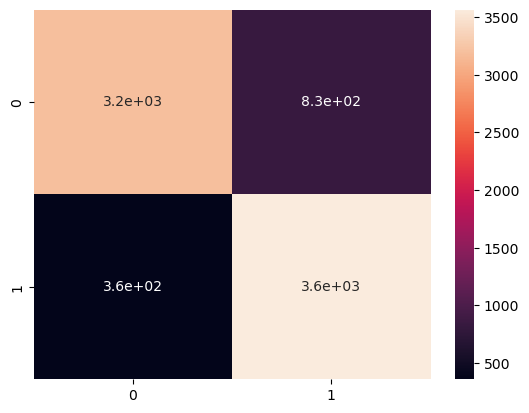

In [90]:
# Predicting the Test set results
y_predict_test = nb_classifier.predict(X_valid)
cm = confusion_matrix(y_valid, y_predict_test)
sns.heatmap(cm, annot = True)

Here are some highlights from the confusion matrix above:
- The model correctly identified 3,600 positive cases and 3,200 negative cases. This shows that the model is generally effective at distinguishing between the two classes.
- The model incorrectly classified 830 negative cases as positive (false positives) and 360 positive cases as negative (false negatives). This indicates some misclassification, with a higher rate of false positives compared to false negatives.
- While the model demonstrates good performance in terms of true positives and true negatives, the presence of false positives and false negatives suggests that there is room for improvement. Techniques such as hyperparameter tuning, feature engineering, or trying different models could help reduce these errors.

In [87]:
# Predict the labels for the validation set
y_pred = nb_classifier.predict(X_valid)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_valid, y_pred)

# Print the accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

# Print a detailed classification report
print('Classification Report:')
print(classification_report(y_valid, y_pred))

Validation Accuracy: 0.8499
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      4024
           1       0.81      0.91      0.86      3924

    accuracy                           0.85      7948
   macro avg       0.85      0.85      0.85      7948
weighted avg       0.86      0.85      0.85      7948



The results from the Naive Bayes classifier on the validation set provide several important insights for evaluating the model's performance:
- **High Accuracy**: With an accuracy of approximately 85%, the Naive Bayes classifier demonstrates strong performance on the validation set.
- **Class Imbalance Handling**: The metrics indicate that the model handles class 1 (positive) better in terms of recall, while class 0 (negative) has higher precision. This suggests that the model is slightly better at identifying positive instances but has a higher precision (lower false positive rate) for negative instances.
- **F1-scores**: The f1-scores for both classes are high (0.84 for class 0 and 0.86 for class 1), showing a good balance between precision and recall.
- **Areas for Improvement**: While the results are strong, there is room for improvement in recall for class 0 and precision for class 1. Techniques such as further feature engineering, hyperparameter tuning, or using different classification algorithms could help improve these metrics.

Overall, the Naive Bayes classifier shows effective performance in text classification with a balanced approach between precision and recall across both classes. This makes it a reliable model for the given dataset, though further refinements could still enhance its performance.

### **8. Neural Network Model**
For the neural network classifier, we will build a model consisting of the following layers:
* ***EmbeddingBag***: Converts words with corresponding indices into vector representations of dimension `embedding_dim`, then calculates the average of the vectors in a sentence to form a representative vector for each document.

* ***Linear***: Converts the representative vectors for each document into an output with 2 nodes for a binary classification problem (2 classes).

<figure style="text-align: center;">
  <img src="../images/5.neural-network-model.png" alt="Neural Network Model" width="600"/>
  <figcaption>Image 5: Classification Model using Neuron Network</figcaption>
</figure>

In [78]:
from torch import nn

# Define the TextClassificationModel class inheriting from nn.Module
class TextClassificationModel(nn.Module):
    # Initialize the model with vocabulary size, embedding dimension, and number of classes
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        
        # EmbeddingBag layer for converting word indices to embeddings and averaging them
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        
        # Linear layer for transforming the averaged embeddings to class scores
        self.fc = nn.Linear(embed_dim, num_class)
        
        # Initialize the weights of the layers
        self.init_weights()
    
    # Method to initialize weights of the layers
    def init_weights(self):
        initrange = 0.5
        
        # Initialize embedding layer weights with uniform distribution
        self.embedding.weight.data.uniform_(-initrange, initrange)
        
        # Initialize linear layer weights with uniform distribution
        self.fc.weight.data.uniform_(-initrange, initrange)
        
        # Initialize linear layer bias with zeros
        self.fc.bias.data.zero_()
    
    # Define the forward pass of the model
    def forward(self, inputs, offsets):
        # Get the embedded representation of inputs, averaged based on offsets
        embedded = self.embedding(inputs, offsets)
        
        # Pass the embedded representation through the linear layer
        return self.fc(embedded)

# Determine the number of classes from the training data labels
num_class = len(set(train_df_vi['label']))

# Determine the size of the vocabulary
vocab_size = len(vocabulary)

# Set the embedding dimension
embed_dim = 256

# Instantiate the model and move it to the specified device (CPU or GPU)
model = TextClassificationModel(vocab_size, embed_dim, num_class).to(device)

Define the loss function and optimizer:

In [80]:
# Set the learning rate for the optimizer
learning_rate = 5

# Define the loss function: CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss()

# Define the optimizer: Stochastic Gradient Descent (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)